In [1]:
import numpy as np
from collections import Counter
from scipy.stats import iqr
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.api as sms
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Car_sales.csv')
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [3]:
df.shape

(157, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [5]:
df.Manufacturer = df.Manufacturer.astype('category')
df.Model = df.Model.astype('category')
df.Vehicle_type = df.Vehicle_type.astype('category')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Manufacturer         157 non-null    category
 1   Model                157 non-null    category
 2   Sales_in_thousands   157 non-null    float64 
 3   __year_resale_value  121 non-null    float64 
 4   Vehicle_type         157 non-null    category
 5   Price_in_thousands   155 non-null    float64 
 6   Engine_size          156 non-null    float64 
 7   Horsepower           156 non-null    float64 
 8   Wheelbase            156 non-null    float64 
 9   Width                156 non-null    float64 
 10  Length               156 non-null    float64 
 11  Curb_weight          155 non-null    float64 
 12  Fuel_capacity        156 non-null    float64 
 13  Fuel_efficiency      154 non-null    float64 
 14  Latest_Launch        157 non-null    object  
 15  Power_perf_factor    15

In [7]:
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


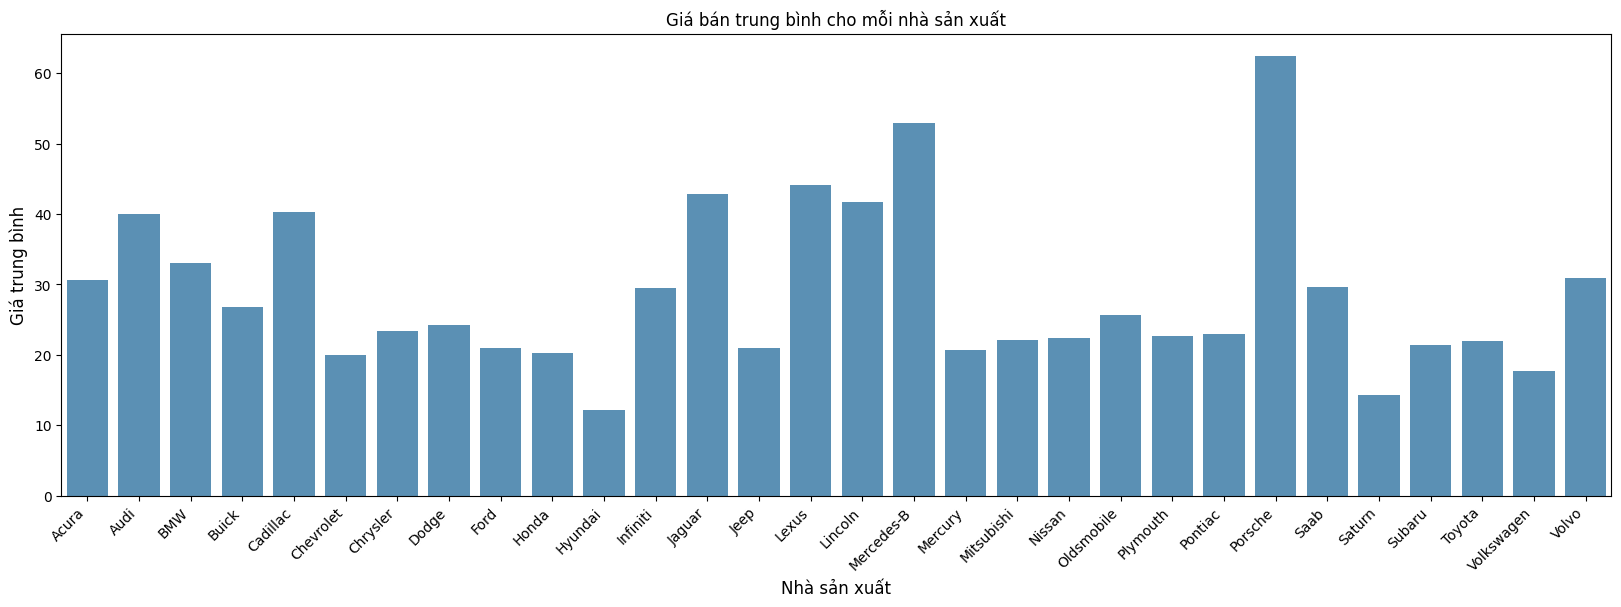

In [8]:
mean_price_manufacturer = df[['Manufacturer', 'Price_in_thousands']].groupby('Manufacturer', as_index = False).mean()
#Giá bán trung bình cho mỗi nhà sản xuất
plt.figure(figsize = (20, 6))
sns.barplot(x=mean_price_manufacturer['Manufacturer'],y= mean_price_manufacturer['Price_in_thousands'], alpha = 0.8)
plt.title('Giá bán trung bình cho mỗi nhà sản xuất')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Giá trung bình', fontsize = 12)
plt.xlabel('Nhà sản xuất', fontsize = 12)
plt.show()

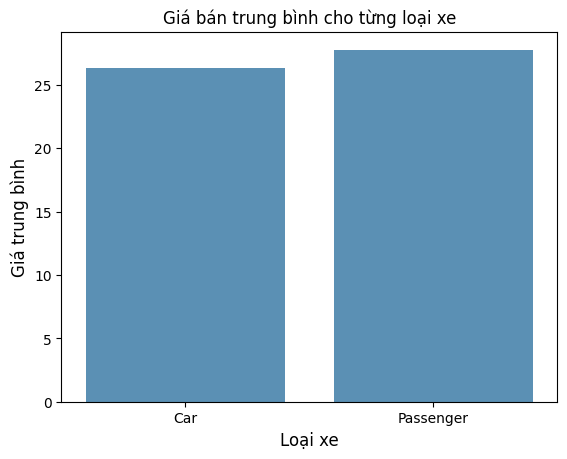

In [9]:
mean_price_vehicle = df[['Vehicle_type', 'Price_in_thousands']].groupby('Vehicle_type', as_index = False).mean()
# Giá bán trung bình cho từng loại xe
sns.barplot(x=mean_price_vehicle['Vehicle_type'],y=mean_price_vehicle['Price_in_thousands'], alpha = 0.8)
plt.title('Giá bán trung bình cho từng loại xe')
plt.ylabel('Giá trung bình', fontsize = 12)
plt.xlabel('Loại xe', fontsize = 12)
plt.show()

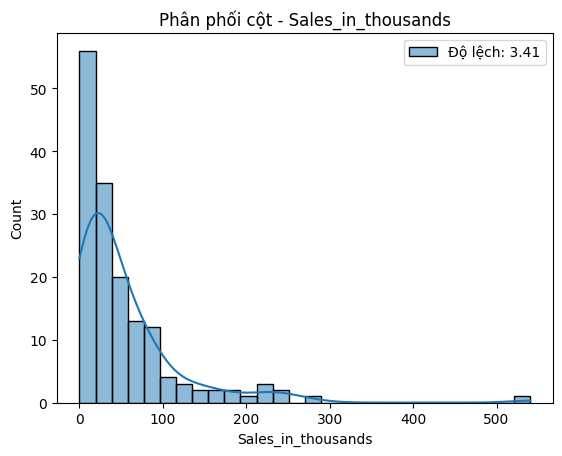

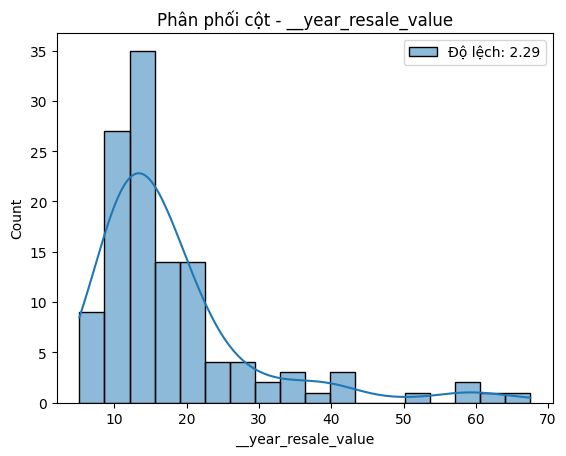

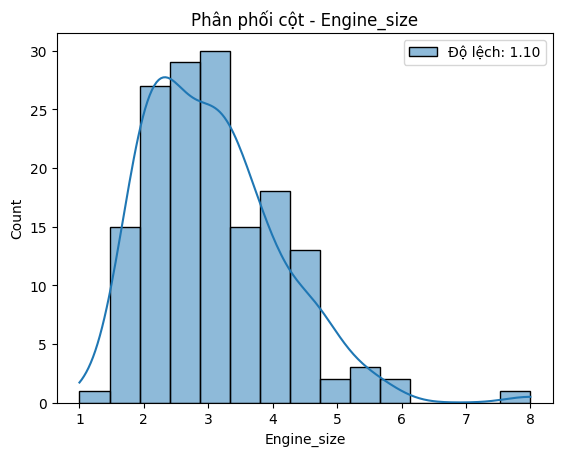

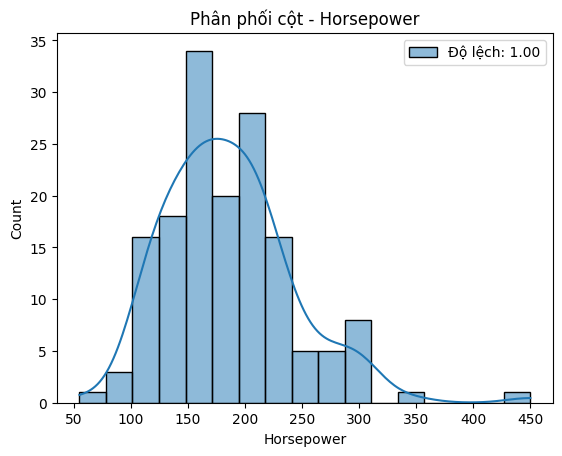

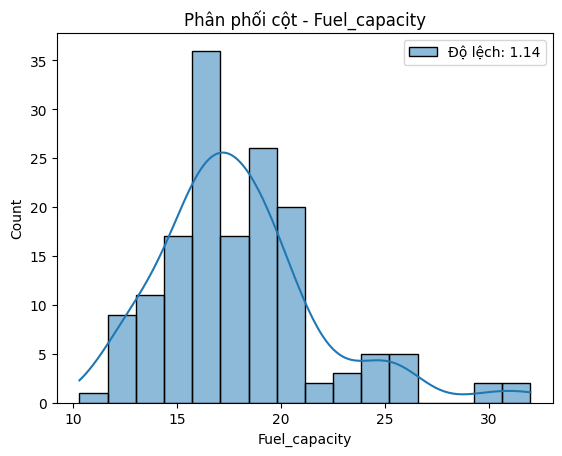

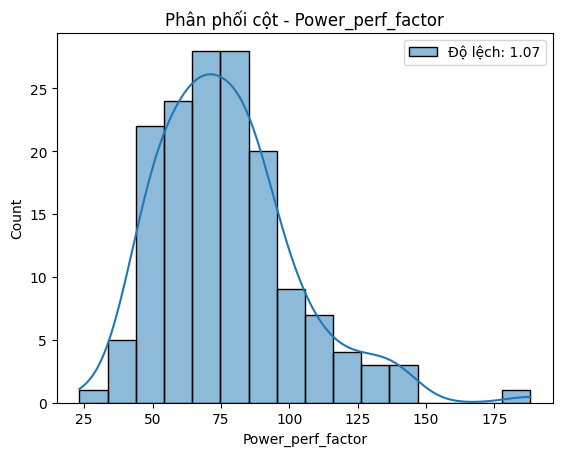

In [10]:
combine_column= ['Sales_in_thousands', '__year_resale_value', 'Engine_size', 'Horsepower', 'Fuel_capacity', 'Power_perf_factor']
for column in combine_column:
    sns.histplot(df[column], kde=True, label='Độ lệch: %.2f' % (df[column].skew()))
    plt.legend(loc='best')
    plt.title(f'Phân phối cột - {column}')
    plt.show()

<Axes: title={'center': 'Price in thousands vs. Power perf factor'}, xlabel='Price_in_thousands', ylabel='Power_perf_factor'>

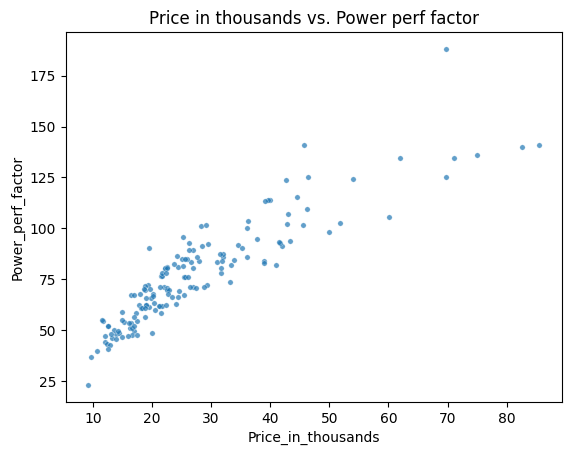

In [11]:
plt.title('Price in thousands vs. Power perf factor')
sns.scatterplot(data=df, x='Price_in_thousands', y='Power_perf_factor', alpha=0.7, s=15)

<Axes: title={'center': 'Fuel_capacity vs. Fuel_efficiency'}, xlabel='Fuel_capacity', ylabel='Fuel_efficiency'>

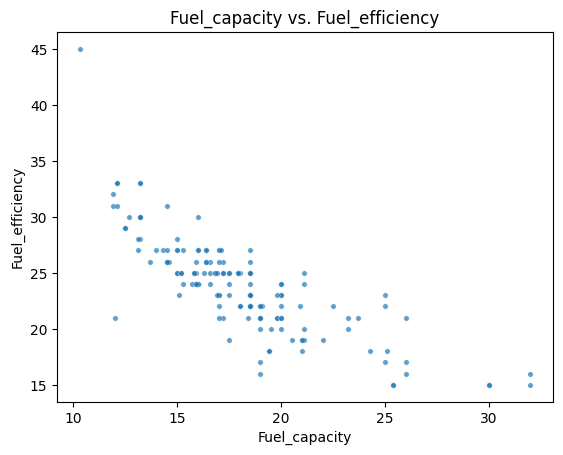

In [12]:
plt.title('Fuel_capacity vs. Fuel_efficiency')
sns.scatterplot(data=df, x='Fuel_capacity', y='Fuel_efficiency', alpha=0.7, s=15)

<Axes: title={'center': 'Curb_weight vs. Horsepower'}, xlabel='Curb_weight', ylabel='Horsepower'>

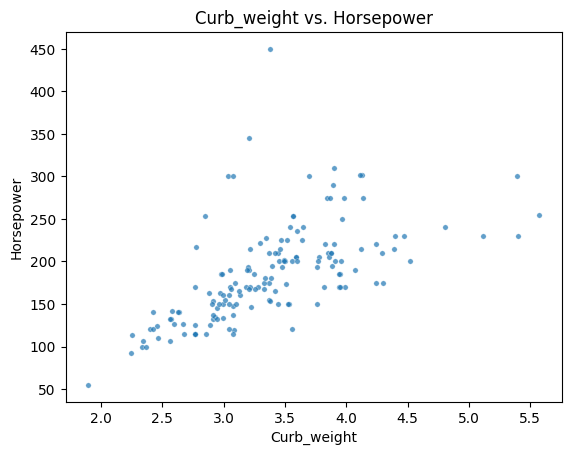

In [13]:
plt.title('Curb_weight vs. Horsepower')
sns.scatterplot(data=df, x='Curb_weight', y='Horsepower', alpha=0.7, s=15)

In [14]:
# Loại bỏ các outliers(Giá trị ngoại lai)
def detect_outliers(df, n, features_list):
    outlier_indices = np.concatenate([
        df[(df[feature] < (Q1 := np.percentile(df[feature], 25)) - 1.5 * (IQR := iqr(df[feature]))) |
           (df[feature] > (Q3 := np.percentile(df[feature], 75)) + 1.5 * IQR)].index
        for feature in features_list
    ])
    
    multiple_outliers = [index for index, count in Counter(outlier_indices).items() if count > n]
    return multiple_outliers

outliers_to_drop = detect_outliers(df, 2, [
    'Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower', 
    'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor'
])

print(f"We will drop these {len(outliers_to_drop)} indices: {outliers_to_drop}")


We will drop these 0 indices: []


In [15]:
df.isnull().sum().sort_values(ascending = False)

__year_resale_value    36
Fuel_efficiency         3
Curb_weight             2
Price_in_thousands      2
Power_perf_factor       2
Wheelbase               1
Engine_size             1
Horsepower              1
Length                  1
Width                   1
Fuel_capacity           1
Sales_in_thousands      0
Vehicle_type            0
Manufacturer            0
Model                   0
Latest_Launch           0
dtype: int64

In [16]:
for column in df.select_dtypes(include=['category', 'object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [17]:
columns_to_fill = ['__year_resale_value', 'Fuel_efficiency', 'Curb_weight', 'Price_in_thousands', 
                   'Power_perf_factor', 'Wheelbase', 'Engine_size', 'Horsepower', 'Length', 
                   'Width', 'Fuel_capacity']

# Áp dụng phương pháp điền giá trị trung vị cho các cột đã chọn
for column in columns_to_fill:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

# Kiểm tra kết quả
print(df[columns_to_fill].head())

   __year_resale_value  Fuel_efficiency  Curb_weight  Price_in_thousands  \
0               16.360             28.0        2.639              21.500   
1               19.875             25.0        3.517              28.400   
2               18.225             26.0        3.470              22.799   
3               29.725             22.0        3.850              42.000   
4               22.255             27.0        2.998              23.990   

   Power_perf_factor  Wheelbase  Engine_size  Horsepower  Length  Width  \
0          58.280150      101.2          1.8       140.0   172.4   67.3   
1          91.370778      108.1          3.2       225.0   192.9   70.3   
2          72.030917      106.9          3.2       225.0   192.0   70.6   
3          91.389779      114.6          3.5       210.0   196.6   71.4   
4          62.777639      102.6          1.8       150.0   178.0   68.2   

   Fuel_capacity  
0           13.2  
1           17.2  
2           17.2  
3           18.0

In [18]:
df.isnull().sum().sort_values(ascending = False)

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

In [19]:
df.drop(['Model'], axis = 1, inplace = True, errors='ignore')
df

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,16.919,16.360,Passenger,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,39.384,19.875,Passenger,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,14.114,18.225,Passenger,22.799,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,72.030917
3,Acura,8.588,29.725,Passenger,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,20.397,22.255,Passenger,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,3.545,14.180,Passenger,24.400,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,15.245,14.180,Passenger,27.500,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,17.531,14.180,Passenger,28.800,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,3.493,14.180,Passenger,45.500,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [20]:
class_1 = [mean_price_manufacturer.iloc[index, 0]
for index in range(len(mean_price_manufacturer)) 
    if mean_price_manufacturer.iloc[index, 1] <= 30]
class_2 = [mean_price_manufacturer.iloc[index, 0]
for index in range(len(mean_price_manufacturer)) 
    if mean_price_manufacturer.iloc[index, 1] > 30]

print('Các nhà sản xuất có giá trung bình dưới 30: ', class_1)
print('Các nhà sản xuất có giá trung bình trên 30: ', class_2)

Các nhà sản xuất có giá trung bình dưới 30:  ['Buick', 'Chevrolet', 'Chrysler', 'Dodge', 'Ford', 'Honda', 'Hyundai', 'Infiniti', 'Jeep', 'Mercury', 'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac', 'Saab', 'Saturn', 'Subaru', 'Toyota', 'Volkswagen']
Các nhà sản xuất có giá trung bình trên 30:  ['Acura', 'Audi', 'BMW', 'Cadillac', 'Jaguar', 'Lexus', 'Lincoln', 'Mercedes-B', 'Porsche', 'Volvo']


In [21]:
df['Manufacturer'] = df['Manufacturer'].apply(lambda x: 1 if x in class_1 else 2)
df['Age'] = df['Latest_Launch'].apply(lambda x: 2022 - int(x.split('/')[-1]))

In [22]:
df['Age']

0      10
1      11
2      10
3      11
4      11
       ..
152    11
153    10
154    11
155    11
156    11
Name: Age, Length: 157, dtype: int64

In [23]:
df

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Age
0,2,16.919,16.360,Passenger,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,10
1,2,39.384,19.875,Passenger,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,11
2,2,14.114,18.225,Passenger,22.799,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,72.030917,10
3,2,8.588,29.725,Passenger,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,11
4,2,20.397,22.255,Passenger,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2,3.545,14.180,Passenger,24.400,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812,11
153,2,15.245,14.180,Passenger,27.500,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495,10
154,2,17.531,14.180,Passenger,28.800,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978,11
155,2,3.493,14.180,Passenger,45.500,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357,11


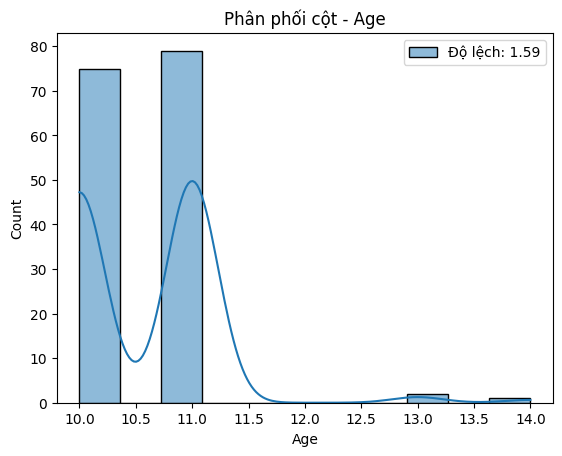

In [24]:
sns.histplot(df['Age'], kde=True, label=f'Độ lệch: {df["Age"].skew():.2f}')
plt.legend(loc='best')
plt.title('Phân phối cột - Age')
plt.show()

In [25]:
df.drop(['Latest_Launch'], axis = 1, inplace = True)
df

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age
0,2,16.919,16.360,Passenger,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,10
1,2,39.384,19.875,Passenger,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,11
2,2,14.114,18.225,Passenger,22.799,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,72.030917,10
3,2,8.588,29.725,Passenger,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,11
4,2,20.397,22.255,Passenger,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2,3.545,14.180,Passenger,24.400,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812,11
153,2,15.245,14.180,Passenger,27.500,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495,10
154,2,17.531,14.180,Passenger,28.800,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978,11
155,2,3.493,14.180,Passenger,45.500,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357,11


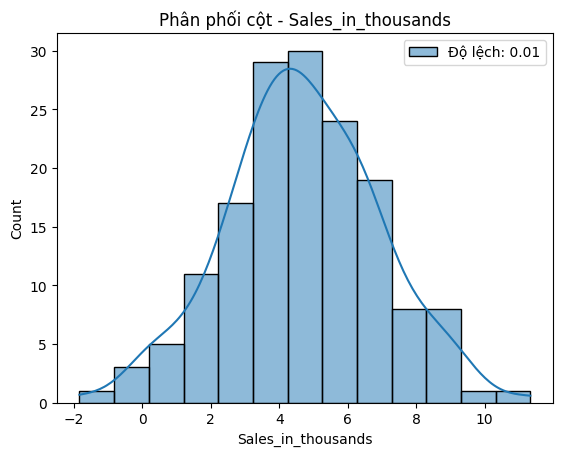

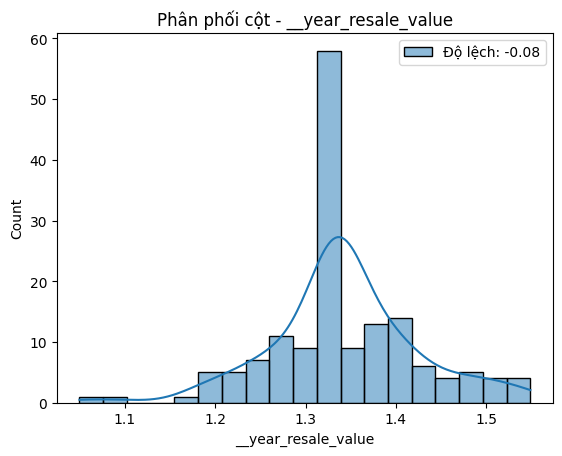

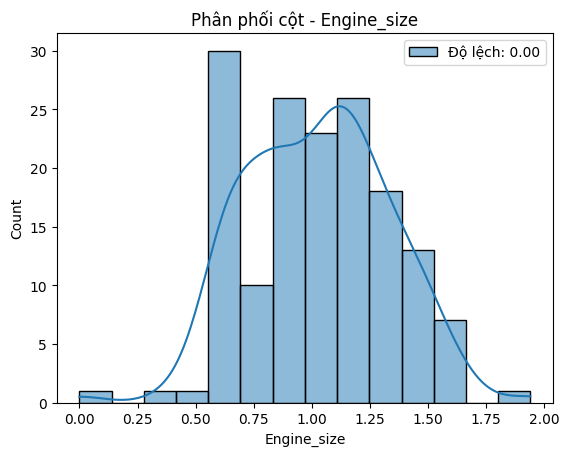

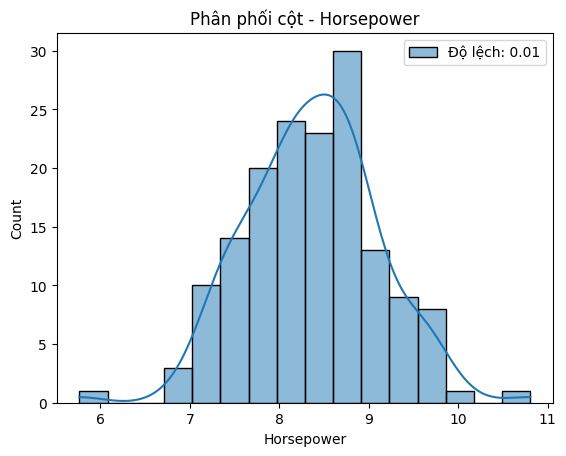

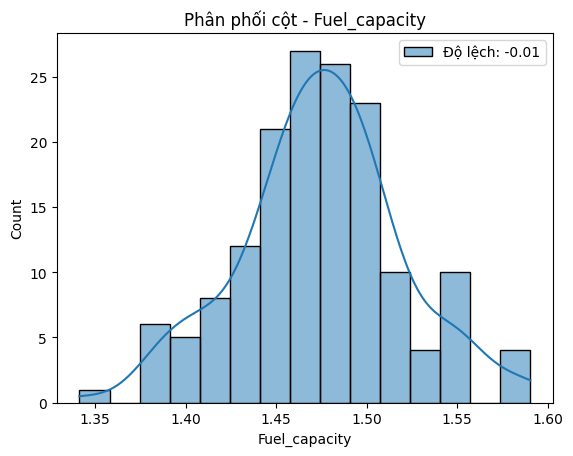

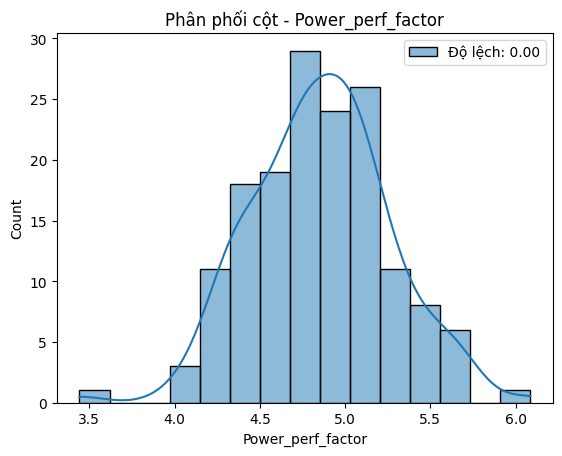

In [26]:
from scipy import stats

columns_to_transform = ['Sales_in_thousands', '__year_resale_value', 'Engine_size', 'Horsepower', 'Fuel_capacity', 'Power_perf_factor']
df[columns_to_transform] = df[columns_to_transform].applymap(lambda x: 1 if x == 0 else x)
for column in columns_to_transform:
    df[column], _ = stats.boxcox(df[column])
for column in columns_to_transform:
    sns.histplot(df[column], kde=True, label='Độ lệch: %.2f' % (df[column].skew()))
    plt.legend(loc='best')
    plt.title(f'Phân phối cột - {column}')
    plt.show()

In [27]:
df

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age
0,2,3.641867,1.365840,Passenger,21.500,0.576300,7.784545,101.2,67.3,172.4,2.639,1.409178,28.0,4.565793,10
1,2,5.120105,1.400955,Passenger,28.400,1.118743,8.940137,108.1,70.3,192.9,3.517,1.472455,25.0,5.137732,11
2,2,3.351727,1.385817,Passenger,22.799,1.118743,8.940137,106.9,70.6,192.0,3.470,1.472455,26.0,4.833434,10
3,2,2.601342,1.461919,Passenger,42.000,1.201352,8.766188,114.6,71.4,196.6,3.850,1.482461,22.0,5.138000,11
4,2,3.950716,1.419578,Passenger,23.990,0.576300,7.946787,102.6,68.2,178.0,2.998,1.461711,27.0,4.659352,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2,1.413646,1.337333,Passenger,24.400,0.628174,8.100306,100.5,67.6,176.6,3.042,1.453114,25.0,4.732096,11
153,2,3.474005,1.337333,Passenger,27.500,0.850150,8.217499,104.9,69.3,185.9,3.208,1.481248,25.0,4.808926,10
154,2,3.699809,1.337333,Passenger,28.800,0.850150,8.217499,104.9,69.3,186.2,3.259,1.481248,25.0,4.817907,11
155,2,1.395303,1.337333,Passenger,45.500,0.809971,9.061693,104.9,71.5,185.7,3.601,1.488376,23.0,5.275120,11


In [28]:
fil_data=df[['Sales_in_thousands', '__year_resale_value', 'Engine_size', 'Horsepower', 'Wheelbase', 
                          'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor','Age']]
fil_data


,Sales_in_thousands,__year_resale_value,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age
0,3.641867,1.365840,0.576300,7.784545,101.2,67.3,172.4,2.639,1.409178,28.0,4.565793,10
1,5.120105,1.400955,1.118743,8.940137,108.1,70.3,192.9,3.517,1.472455,25.0,5.137732,11
2,3.351727,1.385817,1.118743,8.940137,106.9,70.6,192.0,3.470,1.472455,26.0,4.833434,10
3,2.601342,1.461919,1.201352,8.766188,114.6,71.4,196.6,3.850,1.482461,22.0,5.138000,11
4,3.950716,1.419578,0.576300,7.946787,102.6,68.2,178.0,2.998,1.461711,27.0,4.659352,11
...,...,...,...,...,...,...,...,...,...,...,...,...
152,1.413646,1.337333,0.628174,8.100306,100.5,67.6,176.6,3.042,1.453114,25.0,4.732096,11
153,3.474005,1.337333,0.850150,8.217499,104.9,69.3,185.9,3.208,1.481248,25.0,4.808926,10
154,3.699809,1.337333,0.850150,8.217499,104.9,69.3,186.2,3.259,1.481248,25.0,4.817907,11
155,1.395303,1.337333,0.809971,9.061693,104.9,71.5,185.7,3.601,1.488376,23.0,5.275120,11


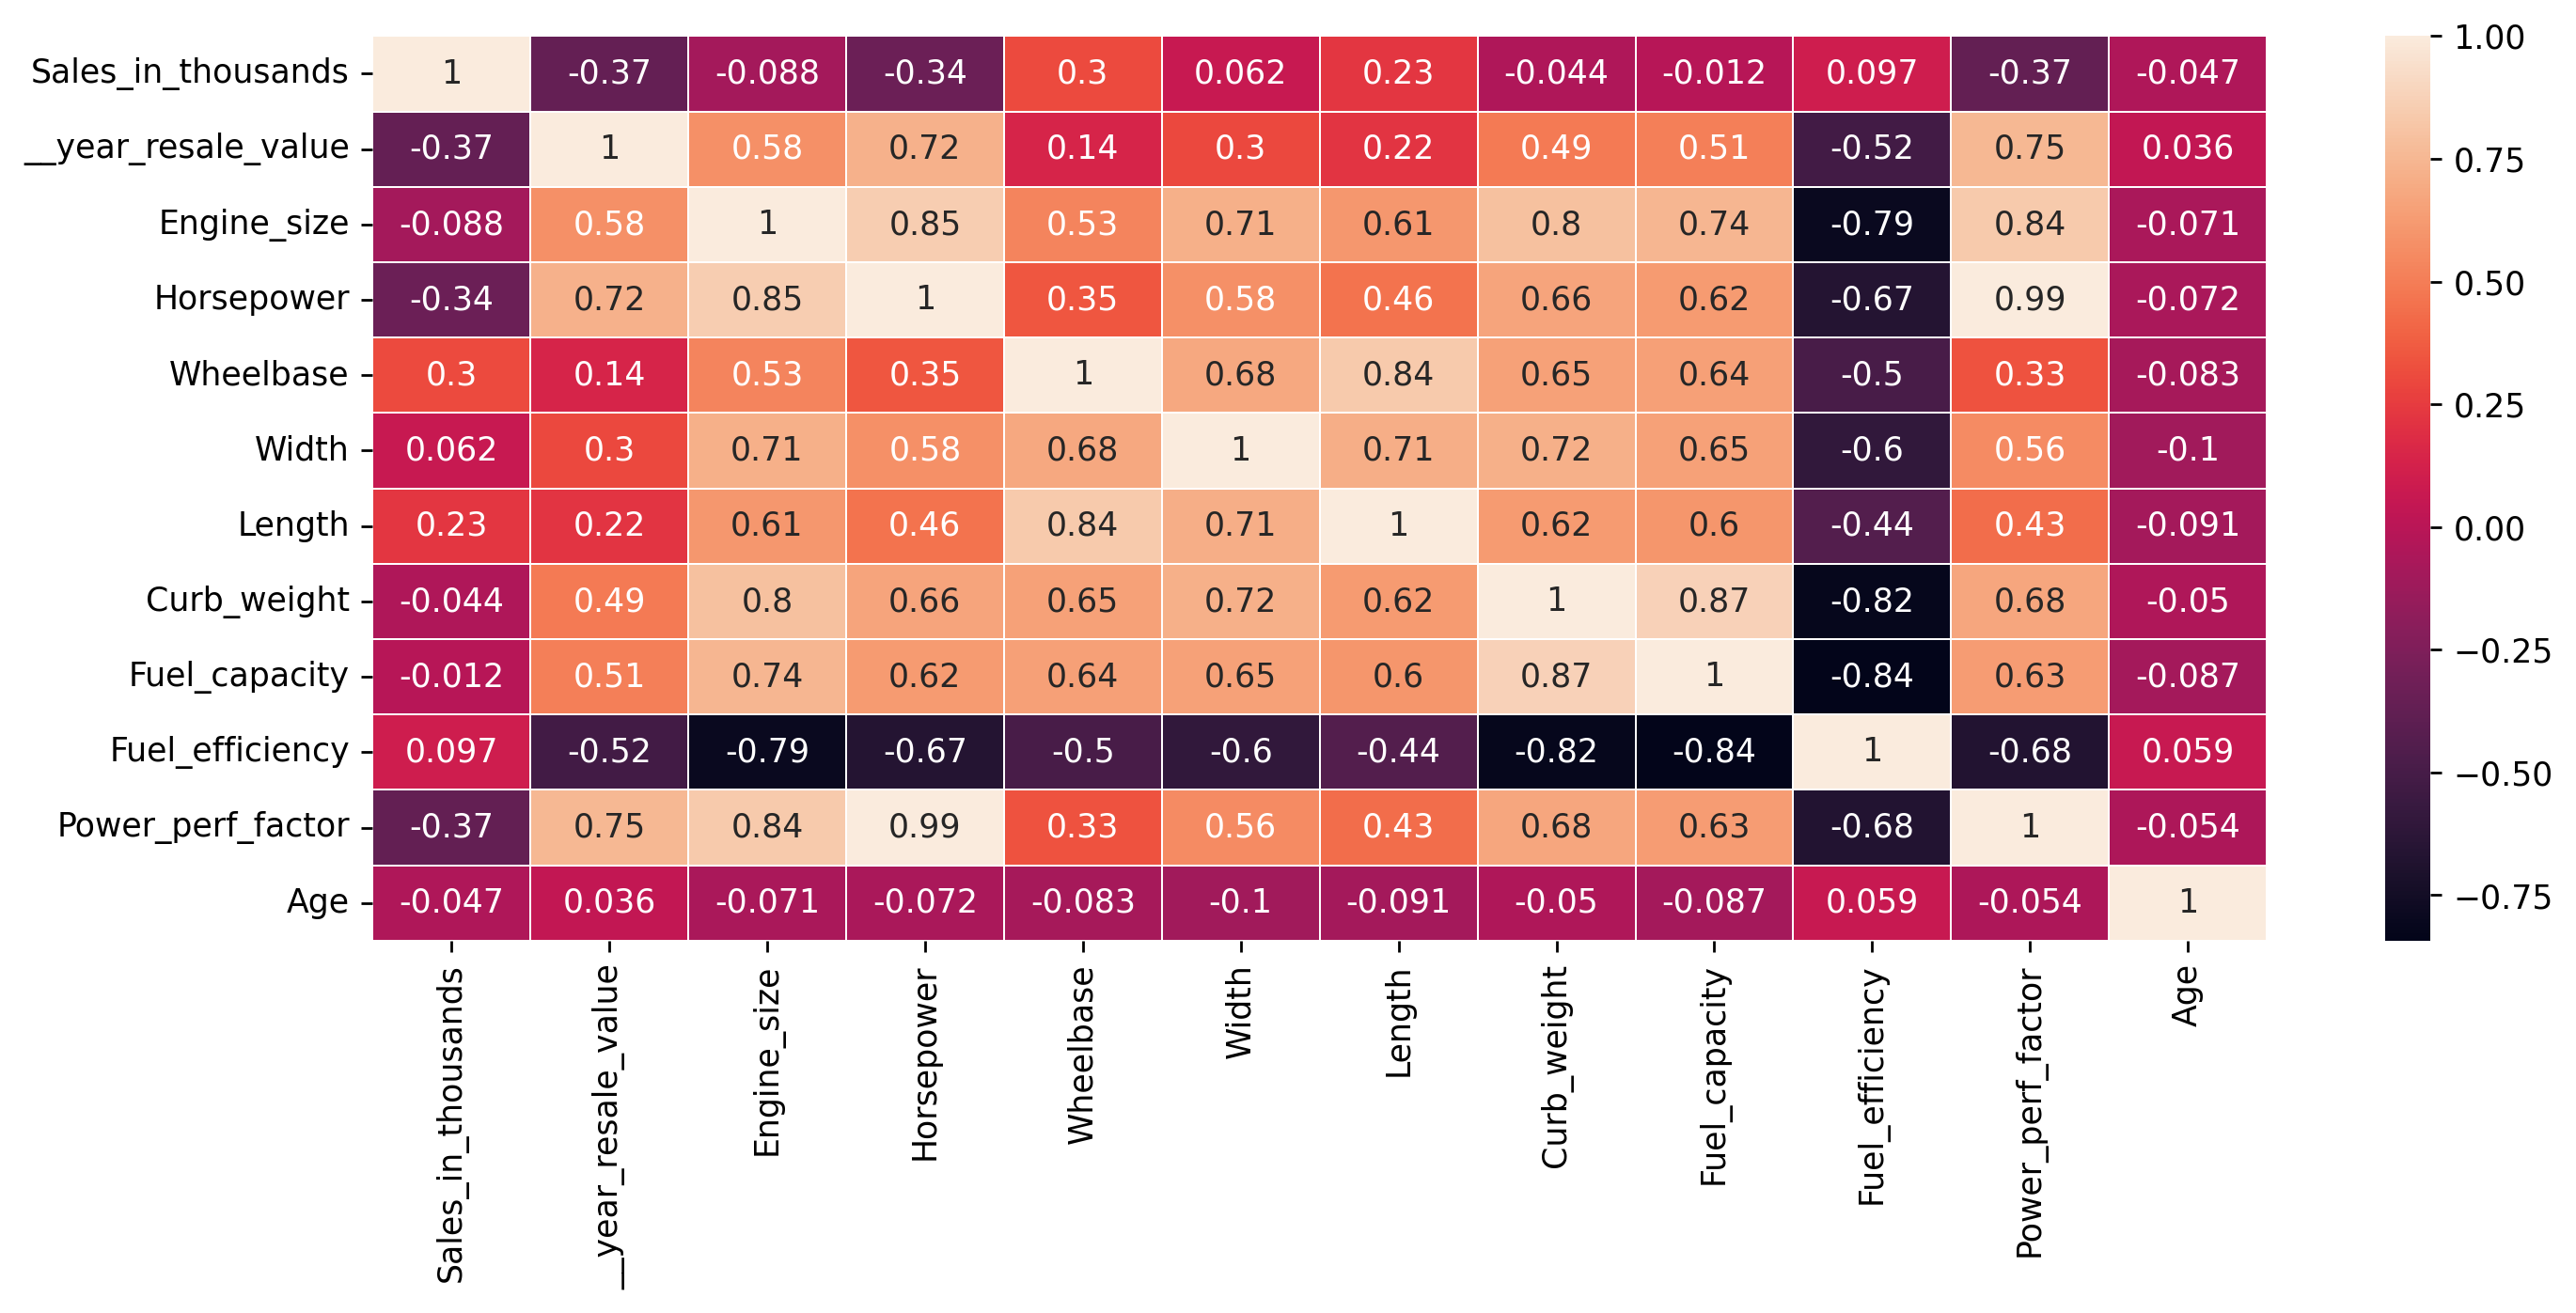

In [29]:
plt.rcParams['font.size'] = 10
plt.rcParams['figure.dpi'] = 250
plt.rcParams['figure.figsize'] = (13,5)
sns.heatmap(fil_data.corr(), annot =True, linewidths=.5)
plt.show()

In [30]:
a_list = df[['Sales_in_thousands', '__year_resale_value', 'Engine_size', 'Horsepower', 'Wheelbase', 'Length', 'Width', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor']]
a = a_list
b = df['Price_in_thousands']

In [31]:
# Tạo DataFrame a_list
a_list = df[['Sales_in_thousands', '__year_resale_value', 'Engine_size', 'Horsepower', 'Wheelbase', 'Length', 'Width', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor']]
b = df['Price_in_thousands']

In [32]:
# Định nghĩa hàm để chạy mô hình OLS và in kết quả
def run_model(a_list, b):
    a = sm.add_constant(a_list)
    a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)
    model = sm.OLS(b_train, a_train).fit()
    print(model.summary())
    return model

In [33]:
# Chạy mô hình ban đầu
print("Model ban đầu")
kq = run_model(a_list, b)

Model ban đầu
                            OLS Regression Results                            
Dep. Variable:     Price_in_thousands   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     71.81
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           1.02e-45
Time:                        01:47:26   Log-Likelihood:                -362.06
No. Observations:                 125   AIC:                             748.1
Df Residuals:                     113   BIC:                             782.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               

In [34]:
# Loại bỏ dần các biến và chạy lại mô hình
columns_to_drop = ["Sales_in_thousands", "Fuel_efficiency", "__year_resale_value", "Wheelbase", "Length", "Horsepower"]
a_list_new = a_list.copy()

for col in columns_to_drop:
    a_list_new = a_list_new.drop([col], axis=1)
    print(f"\nModel sau khi loại bỏ {col}")
    run_model(a_list_new, b)


Model sau khi loại bỏ Sales_in_thousands
                            OLS Regression Results                            
Dep. Variable:     Price_in_thousands   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     69.68
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           7.83e-44
Time:                        01:47:26   Log-Likelihood:                -369.33
No. Observations:                 125   AIC:                             760.7
Df Residuals:                     114   BIC:                             791.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [35]:
# Kiểm tra VIF
vif = pd.DataFrame()
vif["Features"] = a_list_new.columns
vif["VIF"] = [variance_inflation_factor(a_list_new.values, i) for i in range(len(a_list_new.columns))]
print(vif)

            Features          VIF
0        Engine_size    59.062381
1              Width   847.648169
2        Curb_weight   100.021535
3      Fuel_capacity  1171.207560
4  Power_perf_factor   461.957480


In [36]:
# Chạy lại mô hình với các tập hợp biến khác nhau
a8 = df[['Horsepower', 'Engine_size']]
a8 = sm.add_constant(a8)
a_train, a_test, b_train, b_test = train_test_split(a8, b, test_size=0.2, random_state=42)
model8 = sm.OLS(b_train, a_train).fit()
print("\nModel với Horsepower và Engine_size")
print(model8.summary())


Model với Horsepower và Engine_size
                            OLS Regression Results                            
Dep. Variable:     Price_in_thousands   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     116.7
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           4.72e-29
Time:                        01:47:26   Log-Likelihood:                -425.12
No. Observations:                 125   AIC:                             856.2
Df Residuals:                     122   BIC:                             864.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        

In [37]:
vif = pd.DataFrame()
vif["Features"] = a8.columns
vif["VIF"] = [variance_inflation_factor(a8.values, i) for i in range(len(a8.columns))]
print(vif)

      Features         VIF
0        const  282.561131
1   Horsepower    3.639514
2  Engine_size    3.639514


In [38]:
a9 = df[['Power_perf_factor', 'Engine_size']]
a9 = sm.add_constant(a9)
a_train, a_test, b_train, b_test = train_test_split(a9, b, test_size=0.2, random_state=42)
model9 = sm.OLS(b_test, a_test).fit()
print("\nModel với Power_perf_factor và Engine_size")
print(model9.summary())


Model với Power_perf_factor và Engine_size
                            OLS Regression Results                            
Dep. Variable:     Price_in_thousands   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     61.85
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           3.46e-11
Time:                        01:47:26   Log-Likelihood:                -112.26
No. Observations:                  32   AIC:                             230.5
Df Residuals:                      29   BIC:                             234.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [44]:
R_square = model9.rsquared
params = model9.params

0.8100812635505428


In [40]:
print(params[0])
print(params[1])
print(params[2])

-190.97906303850203
48.54081720130863
-16.743474193619956


In [41]:
pre_values = params[0] + params[1] * df['Power_perf_factor'] + params[2] * df['Engine_size']

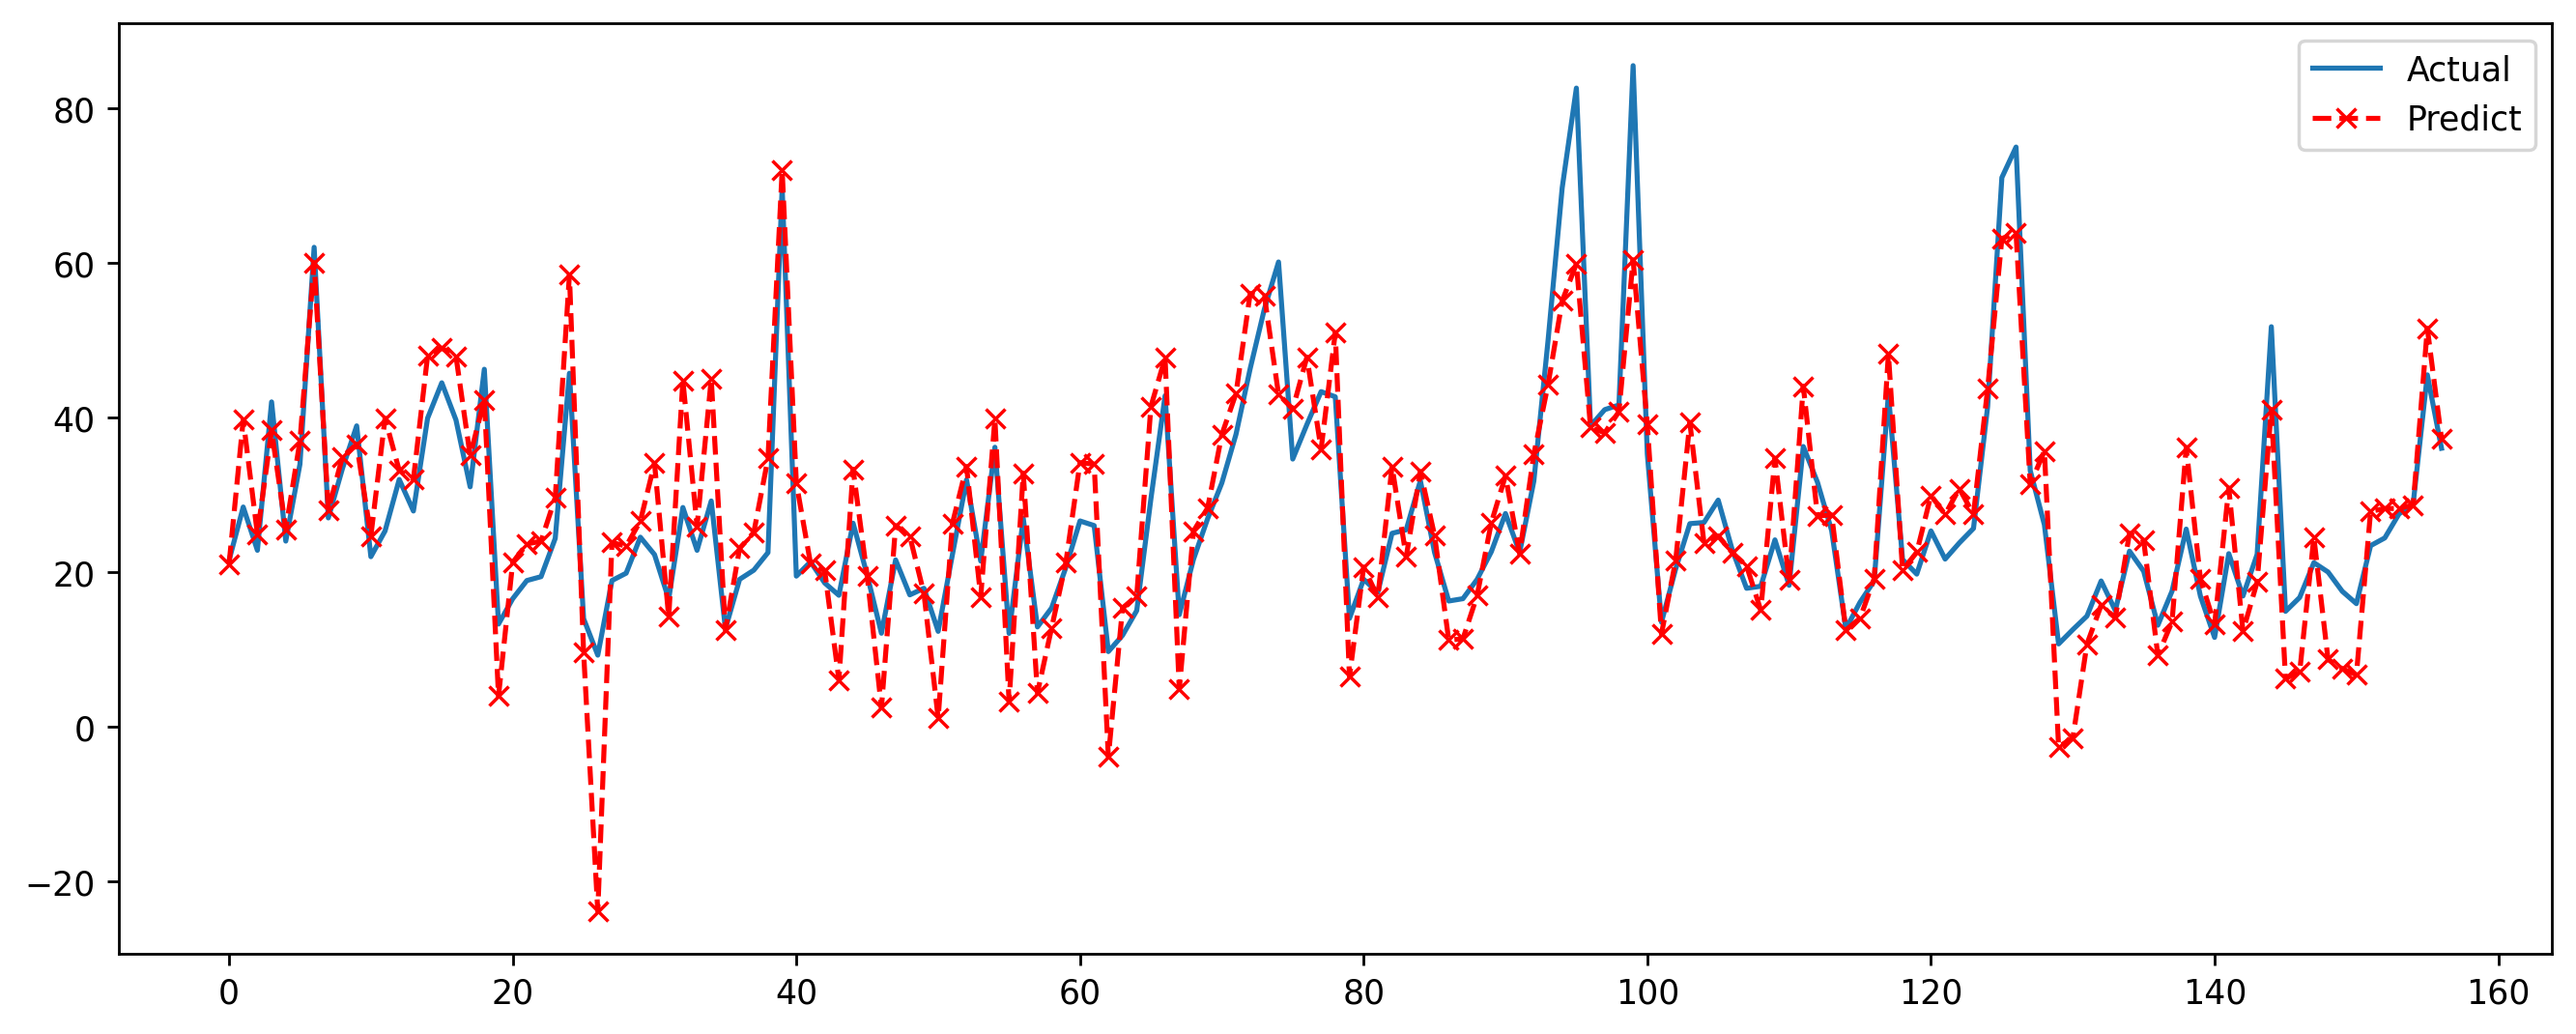

In [42]:
plt.plot(b,label = 'Actual')
plt.plot(pre_values, label = 'Predict', marker = 'x', color = 'red', linestyle = '--')
plt.legend()
plt.show()

In [45]:
other_x = np.array([[4.8, 150], [4.2, 200]])
other_x = sms.add_constant(other_x)
pre_future_values = model9.predict(other_x)
print(pre_future_values)

[-2469.50426952 -3335.80246952]
